## Introduction

1. Why Time Series Analysis?
    
    You just have One key variable - Time
    This is different from Machine learning algorithmse. It is not dependent on various features. IT only depends on time( Seasonality,Trends etc.). Predecting the Sales Variable inaccordence with time.


2. What is Time Series?

Time series is a set of observations taken at a specified times usually at equal intervals.
It is used to predict the future values based on the previous observed values. 

3. Components of Time Series?

a. Trend: - Up Trend / Downtrend / Stationary trend.
    Trend is only for some amount/ some period of time. 
b. Seasonality: - like Festival season
c. Irregularity: - Noise
d. Cyclic: - 


4. When we SHOULD NOT use Time Series Analysis?

a. When the values are constant over a period of time you cannot apply time series
b. Values in the form of Functions

5. What is Stationarity?

Time series has particualr behaviour over time, there is high probability that it will follow the same in the future.
Time Series requires the data to be stationary. Theory and math states that stationary data is more mature than non stationary series. 

Conditions for Stationarity
.......................................
    a. Mean is constant
    b. Constant variance
    c. Auto Covariance that does not depend on time. ( value at time period t and t-1 should not be correlated)

Checking the Stationarity ( We have 2 tests)
..................................................
a. Rolling Statistics
b. ADCF Test (Augmented Dickey–Fuller test)
        Null Hypothesis: - TS is not Stationary
        Alternative Hypothesis: - Ts is Stationary



6. ARIMA Model : - It has 3 parameters "P": - AR, "Q": - MA and "d": - Oder of Differentiation

AR (Auto Regressive) + MA (Moving Average) and "I" is nothing but Integration

AR: - correlation betweent the previous observations. correlation b/w t and t-1.



7. Forecating the future.



## Data 
* This data set is about the Air passengers data from 1949 (Everymonth) to 1960. So we need to forecast for the number of passengers for the upcoming years. There might be specific trend and Seasonality components present in the data. 

* Data Set: - https://www.kaggle.com/rakannimer/air-passenger-prediction?select=AirPassengers.csv

## Loading Packages & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
# importing the data
ts = pd.read_csv(r"D:\Time Series Data\AirPassengers.csv")

### Descriptive Statistics

In [2]:
ts.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
ts.columns
ts['Month'] = pd.to_datetime(ts['Month'],infer_datetime_format = True)
indexedDataset = ts.set_index(['Month'])

In [4]:
ts.head()
#ts.tail()
#ts.shape

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
from datetime import datetime
indexedDataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Number of Passengers')

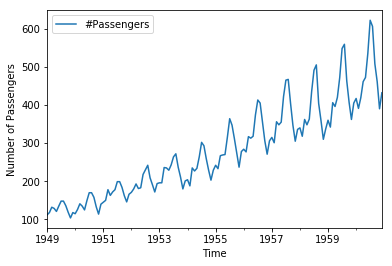

In [6]:
indexedDataset.plot()
plt.xlabel("Time")
plt.ylabel("Number of Passengers")

    From the above graph we can tell that the data is NOT STATIONARY. because it follows trend and the mean is not Constant.Anyway we conform this using Rolling statistics as well as ADCF test. 

In [7]:
rolmean = indexedDataset.rolling(window=12).mean()

rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

### Exploratory Data Analysis for Stationarity

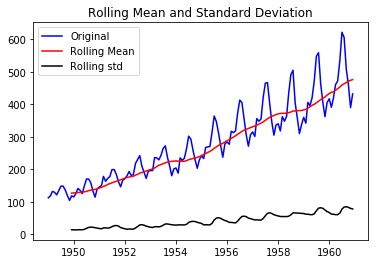

In [8]:
# plotting the Rolling statistics
orig = plt.plot(indexedDataset,color = 'blue',label = 'Original')
mean = plt.plot(rolmean,color = 'red',label = 'Rolling Mean')
std = plt.plot(rolstd,color = 'Black',label = 'Rolling std')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

* Null Hypothesis: - Time series is not Stationary
* Alternative Hypothesis: - Time seris is Stationary


Note: - We need to reject Null Hypothesis if the p value is less than critical value. 

In [9]:
from statsmodels.tsa.stattools import adfuller

print("Results of ADCF test")
dftest = adfuller(indexedDataset['#Passengers'],autolag='AIC')

dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

    
print(dfoutput)


Results of ADCF test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Here p value is greater than critical value so Failed to Reject Null Hypotheis. We need to Accept the Hypotheiss that the given Time Series Data is NOT STATIONARY.

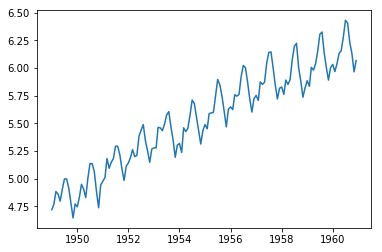

In [10]:
# Estimating the Trend.
# Scaling down the values of the variables.

indexedDataset_logscale = np.log(indexedDataset)
plt.plot(indexedDataset_logscale)

### Applying Transformations
1. Moving Average 
2. Weighted Moving Average


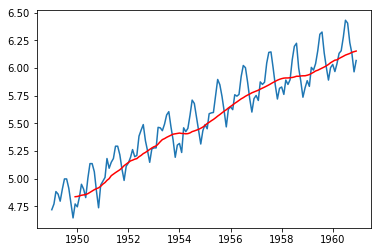

In [11]:
movingaverage = indexedDataset_logscale.rolling(window = 12).mean()
movingstd = indexedDataset_logscale.rolling(window=12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingaverage,color = 'red')

Here in the above graph also the data is not Stationary but better than previous one. 

In [12]:
# Difference between Moving average and Actual number of Passengers

datasetLogScaleMinusMovingAverage = indexedDataset_logscale-movingaverage
datasetLogScaleMinusMovingAverage.head(5)

print("================Removing Null values====================")
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

================Removing Null values====================


,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingaverage = timeseries.rolling(window = 12).mean()
    movingstd = timeseries.rolling(window=12).std()
    
    # plotting Rolling Statistics
    orig = plt.plot(timeseries,color = 'blue',label = 'Original')
    mean = plt.plot(movingaverage,color = 'red',label = 'Rolling Mean')
    std = plt.plot(movingstd,color = 'Black',label = 'Rolling std')
    plt.legend(loc='best')
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block=False)
    
    
    dftest = adfuller(timeseries['#Passengers'],autolag='AIC')

    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    
    print(dfoutput)

    

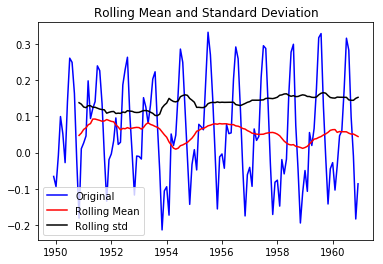

Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [14]:
test_stationarity(datasetLogScaleMinusMovingAverage)

From the Above graphs and Data it is evident that the data contains Stationarity.

p statistics tells that the data is stationary or not. Test Statistic and Critical value is almost equal. So this is good. 

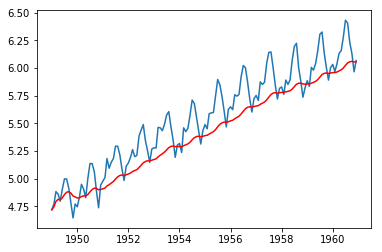

In [15]:
# Weighted Moving Average
 
exponentialDecayWeightedAverage = indexedDataset_logscale.ewm(halflife = 12,min_periods = 0,adjust=  True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage,color = 'red')


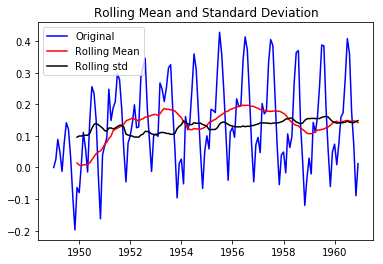

Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [16]:
datasetLogscaleMiunsMovingExponentialDecayAverage = indexedDataset_logscale-exponentialDecayWeightedAverage
test_stationarity(datasetLogscaleMiunsMovingExponentialDecayAverage)

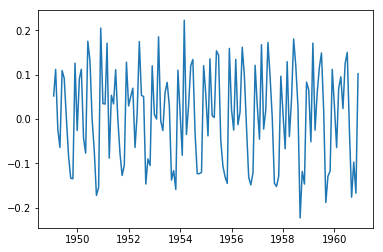

In [17]:
datasetLogDiffShifting = indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(datasetLogDiffShifting)

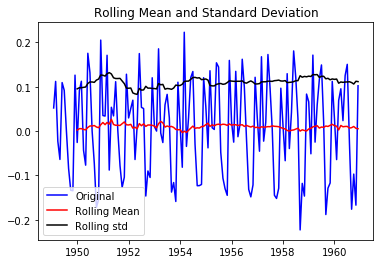

Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [18]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

### Components of Trend , Seasonality and Residuals.

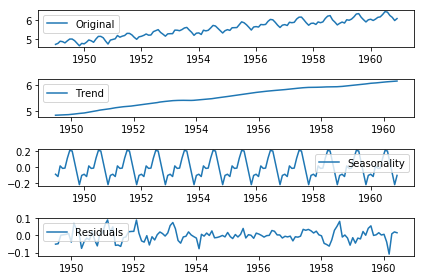

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

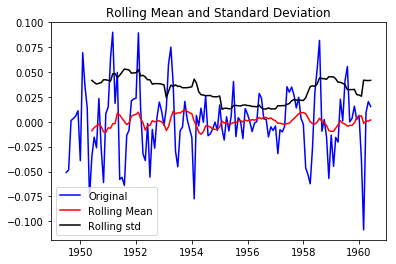

Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [20]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

## Finding P and Q values

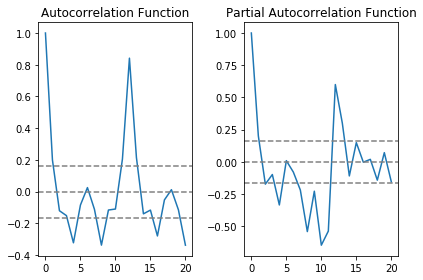

In [21]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

The above ACF and PACF graphs gives the values of P and Q in the ARIMA model. P value is the where the PACF graph touches zero and Q value is where ACF graph touches zero. 

## ARIMA  (vs) AR (vs) MA model

* Comparing the 3 models using RSS value ( Residuals sum of Squares) is less that is considered as the best model.

Plotting AR model


C:\Users\MANI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\MANI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\MANI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


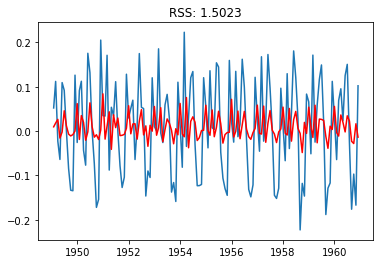

In [22]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logscale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')

Plotting AR model


C:\Users\MANI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\MANI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


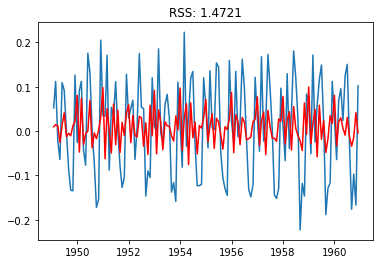

In [23]:
#MA MODEL
model = ARIMA(indexedDataset_logscale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')

C:\Users\MANI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\MANI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

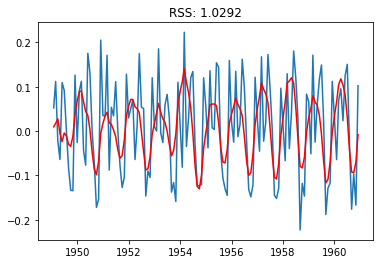

In [24]:
model = ARIMA(indexedDataset_logscale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))

In [25]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [26]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [27]:
#predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#predictions_ARIMA_log.head()

predictions_ARIMA_log = pd.Series(indexedDataset_logscale['#Passengers'].ix[0], index=indexedDataset_logscale['#Passengers'].index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\MANI\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1045')

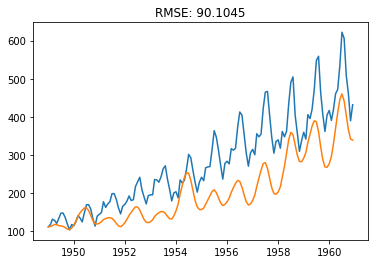

In [28]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset["#Passengers"])**2)/len(indexedDataset["#Passengers"])))